In [2]:
import numpy as np
import torch 
import torch.linalg as linalg
import matplotlib.pyplot as plt
from torch import tensor
from time import time_ns

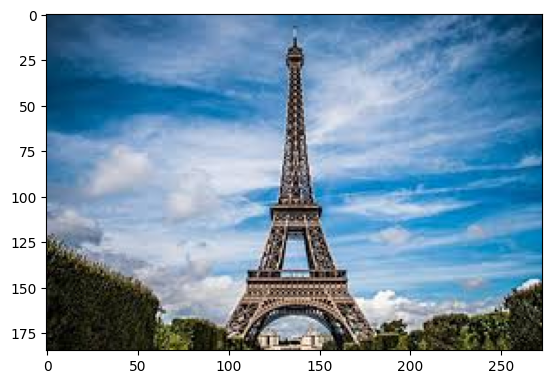

In [3]:
image = plt.imread("Sample.jpeg")
plt.imshow(image)

In [8]:
np_times = []
t_times = []
a = tensor(image,dtype=torch.float)
for j in range(1,100):
    i = time_ns()
    print(torch.norm(a))
    time = time_ns()-i
    t_times.append(time)
    i = time_ns()
    print(np.linalg.norm(image))
    time = time_ns()-i
    np_times.append(time)

tensor(58689.6914)
58689.665274220126
tensor(58689.6914)
58689.665274220126
tensor(58689.6914)
58689.665274220126
tensor(58689.6914)
58689.665274220126
tensor(58689.6914)
58689.665274220126
tensor(58689.6914)
58689.665274220126
tensor(58689.6914)
58689.665274220126
tensor(58689.6914)
58689.665274220126
tensor(58689.6914)
58689.665274220126
tensor(58689.6914)
58689.665274220126
tensor(58689.6914)
58689.665274220126
tensor(58689.6914)
58689.665274220126
tensor(58689.6914)
58689.665274220126
tensor(58689.6914)
58689.665274220126
tensor(58689.6914)
58689.665274220126
tensor(58689.6914)
58689.665274220126
tensor(58689.6914)
58689.665274220126
tensor(58689.6914)
58689.665274220126
tensor(58689.6914)
58689.665274220126
tensor(58689.6914)
58689.665274220126
tensor(58689.6914)
58689.665274220126
tensor(58689.6914)
58689.665274220126
tensor(58689.6914)
58689.665274220126
tensor(58689.6914)
58689.665274220126
tensor(58689.6914)
58689.665274220126
tensor(58689.6914)
58689.665274220126
tensor(58689

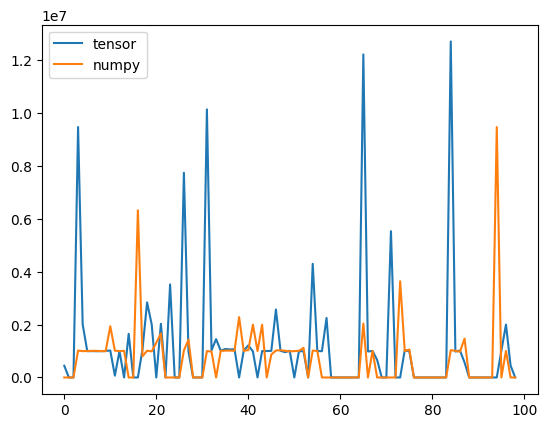

avg time by tensor = 1224024.2424242424nsec
avg time by numpy = 764312.1212121212nsec


In [9]:
plt.figure()
plt.plot(t_times,label="tensor")
plt.plot(np_times,label="numpy")
plt.legend()
plt.show()
print(f"avg time by tensor = {np.average(t_times)}nsec")
print(f"avg time by numpy = {np.average(np_times)}nsec")

In [4]:
def cost(centroids,clusters):
    return np.mean([np.square(np.linalg.norm(clusters[i]-centroids[i])) for i in range(len(centroids))])

def assign_centroids(clusters):
    temp = []
    for i in clusters:
        temp.append(np.mean(i,axis=0))
    
    return np.array(temp)

def assign_clusters(data, centroids, cluster_num):
    # Initialize clusters as a list of empty lists
    clusters = [[] for _ in range(cluster_num)]
    
    for i in data:
        centroid_index = np.argmin(np.linalg.norm(centroids - i, axis=1))
        clusters[centroid_index].append(i)
    
    clusters = [np.array(cluster) for cluster in clusters]
    return clusters

In [59]:
assign_clusters(data,centroids,4)

[array([[ 85, 126, 178],
        [ 87, 128, 180],
        [ 87, 128, 180],
        ...,
        [118, 121,  68],
        [120, 123,  70],
        [107, 109,  62]], dtype=uint8),
 array([[ 74, 130, 179],
        [ 74, 130, 179],
        [ 74, 130, 179],
        ...,
        [220, 197, 179],
        [226, 203, 185],
        [166, 150, 134]], dtype=uint8),
 array([[29, 63, 91],
        [29, 63, 91],
        [29, 62, 93],
        ...,
        [17, 17,  7],
        [23, 23, 11],
        [40, 41, 27]], dtype=uint8),
 array([[ 73, 119, 169],
        [ 74, 117, 168],
        [ 77, 120, 171],
        ...,
        [ 84,  83,  39],
        [ 82,  84,  37],
        [ 82,  82,  48]], dtype=uint8)]

In [67]:
def K_means(data,cluster_num,initial_setup):
    clusters,centroids = initial_setup(data,cluster_num)
    converged = 1
    while True:
        new_centroids = assign_centroids(clusters)
        converged = np.max(new_centroids-centroids)
        if converged==0:
            print(cost(centroids,clusters))
            return [clusters,centroids]
        else:
            centroids = new_centroids
            clusters = assign_clusters(data,centroids,cluster_num)

def random_initial(data,K):
    centroids = data[np.random.randint(0,len(data),(K,))]
    clusters = assign_clusters(data,centroids,K)
    return clusters,centroids

In [9]:
dimension = (image.shape[0]*image.shape[1],image.shape[2])
data = np.reshape(image,dimension)
#cluster,centroid = K_means(data,4)

In [12]:
def compress_image(image,data,cluster,centroid):
    replaced_data = np.empty_like(data)

    point_to_centroid = {}
    
    for cluster_idx, cluster in enumerate(cluster):
        for point in cluster:
            point_to_centroid[tuple(point)] = centroid[cluster_idx]
    
    for i, point in enumerate(data):
        replaced_data[i] = point_to_centroid[tuple(point)]
    
    return np.reshape(replaced_data,image.shape)

In [99]:
compressed=compress_image(image,data,cluster,centroid)

In [13]:
plt.imshow(compressed)

NameError: name 'compressed' is not defined

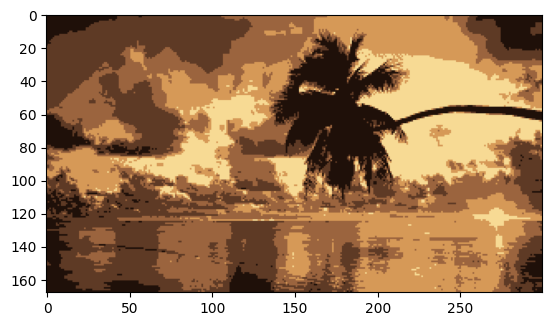

In [139]:
dimension = (image.shape[0]*image.shape[1],image.shape[2])
data = np.reshape(image,dimension)
cluster1,centroid1 = K_means(data,5)
compressed1 = compress_image(image,data,cluster1,centroid1)
plt.imshow(compressed1)

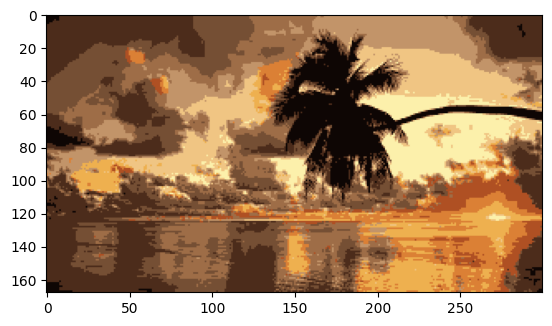

In [125]:
dimension = (image.shape[0]*image.shape[1],image.shape[2])
data = np.reshape(image,dimension)
cluster1,centroid1 = K_means(data,10)
compressed1 = compress_image(image,data,cluster1,centroid1)
plt.imshow(compressed1)

In [126]:
dimension = (image.shape[0]*image.shape[1],image.shape[2])
data = np.reshape(image,dimension)
cluster1,centroid1 = K_means(data,2)
compressed1 = compress_image(image,data,cluster1,centroid1)
plt.imshow(compressed1)

KeyboardInterrupt: 

25378632.331947546


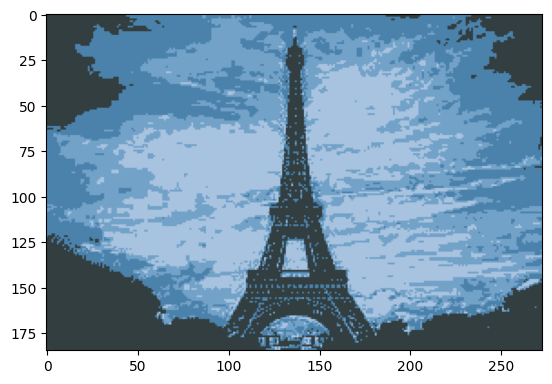

In [68]:
dimension = (image.shape[0]*image.shape[1],image.shape[2])
data = np.reshape(image,dimension)
cluster1,centroid1 = K_means(data,4,random_initial)
compressed2 = compress_image(image,data,cluster1,centroid1)
plt.imshow(compressed1)

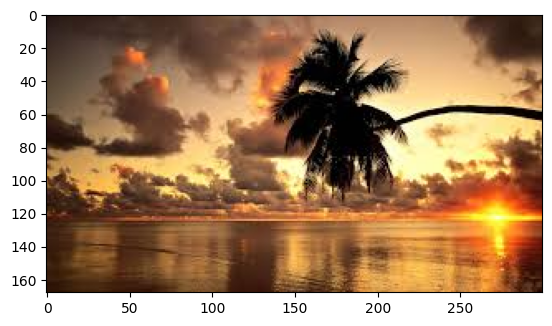

In [71]:
image = plt.imread("sample2.jpeg")
plt.imshow(image)
dimension = (image.shape[0]*image.shape[1],image.shape[2])
data = np.reshape(image,dimension)


Experimenting a way to initialize the data so that kmeans run faster

    The data will be sorted along a dimension in which the variance is maximum and then the sorted data will be split into K clusters, So the resulting clusters would be the initial guess for the K-means

In [34]:
def max_variance_axis(data,K):

    #finding the dimention with max variance and sorting along that
    dim = np.argmax(np.var(data,axis=0))
    temp_data = data[np.argsort(data[:,dim])]

    #Clustering
    clusters = np.array_split(temp_data,K)
    centroids = assign_centroids(clusters)

    return clusters,centroids
    


6135249.875575397


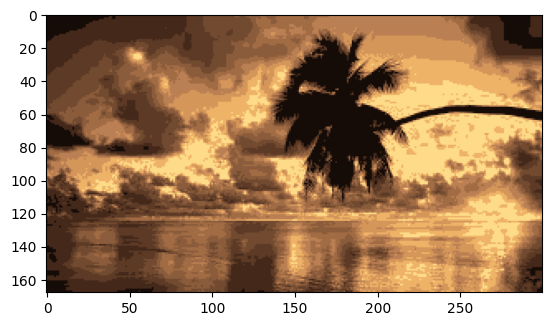

In [76]:
dimension = (image.shape[0]*image.shape[1],image.shape[2])
data = np.reshape(image,dimension)
cluster1,centroid1 = K_means(data,10,max_variance_axis)
compressed1 = compress_image(image,data,cluster1,centroid1)
plt.imshow(compressed1)

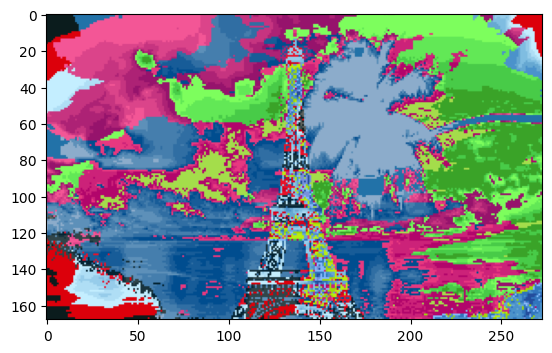

In [81]:
plt.imshow(compressed1[:,:273]-compressed2[:168,:])

Initializing using Principle component analysis(PCA)

In [104]:
def PCA(data,K):

    #Centering the data
    temp_data = data - np.mean(data,axis=0)

    #First principal component
    eigval,eigvec = np.linalg.eig(temp_data.T@temp_data)
    max_eig = np.argmax(eigval)
    max_eigvec = eigvec[max_eig]
    print(max_eigvec)
    projections = temp_data@max_eigvec

    temp_data = data[np.argsort(projections)]
    
    clusters = np.array_split(temp_data,K)
    centroids = assign_centroids(clusters)

    return clusters,centroids

[-0.68287759 -0.63604039  0.35934777]
24361459.032916665


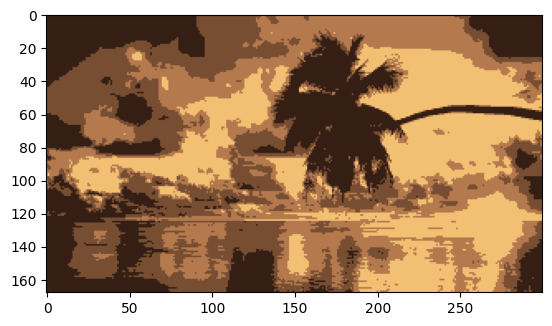

In [108]:
dimension = (image.shape[0]*image.shape[1],image.shape[2])
data = np.reshape(image,dimension)
cluster1,centroid1 = K_means(data,4,PCA)
compressed1 = compress_image(image,data,cluster1,centroid1)
plt.imshow(compressed1)